In [1]:
import cv2
import os
import sys
import time
import numpy as np 
import json
import skimage
from matplotlib import pyplot as plt
from skimage import color
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import ShuffleSplit


In [2]:
clases = os.listdir("raw-img")
print("CLASES:" , len(clases) , clases)

CLASES: 8 ['cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno']


In [14]:
# Creamos las listas donde almacenaremos las características y las etiquetas
X = []
Y = []
ppc = 10

HEIGHT =  200
WIDTH = 300

NImagenes = 400

# Recorremos cada una de las carpetas
for folder in os.listdir("raw-img"):
    print("Procesando label: ", folder)
    # Leemos cada una de las imágenes de la carpeta
    for count, file in enumerate(os.listdir(os.path.join("raw-img", folder))[:NImagenes]):
        # Cargamos la imagen y la convertimos a escala de grises
        image = skimage.io.imread(os.path.join("raw-img", folder, file), as_gray=True)

        resized_image = cv2.resize(image, (HEIGHT, WIDTH), interpolation=cv2.INTER_LINEAR)
        # Calculamos las características con HOG
        features = hog(resized_image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2')
        # Añadimos las características y la etiqueta a las listas
        X.append(features)
        Y.append(folder)
        progress = 100 * (count + 1) / len(os.listdir(os.path.join("raw-img", folder))[:NImagenes])
        sys.stdout.write( "\r Procesando Xtest ... (" + str(int(progress)) + " %)")
    print("")
X = np.array(X)
Y = np.array(Y)
print(X.shape, Y.shape)


Procesando label:  cavallo
 Procesando Xtest ... (100 %)
Procesando label:  elefante
 Procesando Xtest ... (100 %)
Procesando label:  farfalla
 Procesando Xtest ... (100 %)
Procesando label:  gallina
 Procesando Xtest ... (100 %)
Procesando label:  gatto
 Procesando Xtest ... (100 %)
Procesando label:  mucca
 Procesando Xtest ... (100 %)
Procesando label:  pecora
 Procesando Xtest ... (100 %)
Procesando label:  ragno
 Procesando Xtest ... (100 %)
(3200, 58752) (3200,)


In [16]:

rs = ShuffleSplit(n_splits=5, test_size=.20, random_state=0)
for train_index, test_index in rs.split(X, Y):
    Xtrain = X[train_index]
    ytrain = Y[train_index]
    Xtest = X[test_index]
    ytest = Y[test_index]
    

print("SHAPE Xtrain",Xtrain.shape)
print("SHAPE y_train",ytrain.shape)
print("SHAPE X_test",Xtest.shape)
print("SHAPE y_test",ytest.shape)

SHAPE Xtrain (2560, 58752)
SHAPE y_train (2560,)
SHAPE X_test (640, 58752)
SHAPE y_test (640,)


In [22]:
clf = svm.SVC()
clf.fit(Xtrain, ytrain)
y_pred = clf.predict(Xtest)
print("Accuracy: "+str(accuracy_score(ytest, y_pred)))
print('\n')
print(classification_report(ytest, y_pred))


Accuracy: 0.53984375


              precision    recall  f1-score   support

     cavallo       0.66      0.55      0.60       199
    elefante       0.58      0.51      0.54       167
    farfalla       0.51      0.54      0.52       138
     gallina       0.61      0.63      0.62       170
       gatto       0.53      0.62      0.57       158
       mucca       0.52      0.48      0.50       163
      pecora       0.41      0.45      0.43       154
       ragno       0.49      0.54      0.51       131

    accuracy                           0.54      1280
   macro avg       0.54      0.54      0.54      1280
weighted avg       0.55      0.54      0.54      1280



In [5]:
clf = svm.SVC()
clf.fit(Xtrain, ytrain)
y_pred = clf.predict(Xtest)
print("Accuracy: "+str(accuracy_score(ytest, y_pred)))
print('\n')
print(classification_report(ytest, y_pred))

Accuracy: 0.5375


              precision    recall  f1-score   support

     cavallo       0.63      0.65      0.64        37
    elefante       0.51      0.43      0.47        42
    farfalla       0.52      0.66      0.58        41
     gallina       0.48      0.47      0.47        43
       gatto       0.63      0.58      0.60        38
       mucca       0.65      0.52      0.58        42
      pecora       0.34      0.39      0.37        38
       ragno       0.60      0.62      0.61        39

    accuracy                           0.54       320
   macro avg       0.54      0.54      0.54       320
weighted avg       0.54      0.54      0.54       320



In [8]:
## ppc 25 400 imagenes
clf = svm.SVC()
clf.fit(Xtrain, ytrain)
y_pred = clf.predict(Xtest)
print("Accuracy: "+str(accuracy_score(ytest, y_pred)))
print('\n')
print(classification_report(ytest, y_pred))

Accuracy: 0.5796875


              precision    recall  f1-score   support

     cavallo       0.66      0.55      0.60        73
    elefante       0.71      0.53      0.60        99
    farfalla       0.64      0.52      0.58        84
     gallina       0.64      0.56      0.60        81
       gatto       0.52      0.64      0.57        74
       mucca       0.59      0.64      0.61        77
      pecora       0.52      0.67      0.59        81
       ragno       0.44      0.56      0.50        71

    accuracy                           0.58       640
   macro avg       0.59      0.58      0.58       640
weighted avg       0.60      0.58      0.58       640



In [5]:
## ppc 30 400 imagenes
clf = svm.SVC()
clf.fit(Xtrain, ytrain)
y_pred = clf.predict(Xtest)
print("Accuracy: "+str(accuracy_score(ytest, y_pred)))
print('\n')
print(classification_report(ytest, y_pred))

Accuracy: 0.5828125


              precision    recall  f1-score   support

     cavallo       0.69      0.56      0.62        73
    elefante       0.71      0.47      0.57        99
    farfalla       0.64      0.50      0.56        84
     gallina       0.63      0.57      0.60        81
       gatto       0.56      0.66      0.61        74
       mucca       0.56      0.65      0.60        77
      pecora       0.52      0.70      0.60        81
       ragno       0.46      0.58      0.51        71

    accuracy                           0.58       640
   macro avg       0.60      0.59      0.58       640
weighted avg       0.60      0.58      0.58       640



In [8]:
## ppc 40 400 imagenes
clf = svm.SVC()
clf.fit(Xtrain, ytrain)
y_pred = clf.predict(Xtest)
print("Accuracy: "+str(accuracy_score(ytest, y_pred)))
print('\n')
print(classification_report(ytest, y_pred))

Accuracy: 0.56875


              precision    recall  f1-score   support

     cavallo       0.63      0.59      0.61        73
    elefante       0.67      0.51      0.57        99
    farfalla       0.61      0.49      0.54        84
     gallina       0.61      0.57      0.59        81
       gatto       0.55      0.62      0.58        74
       mucca       0.60      0.60      0.60        77
      pecora       0.49      0.65      0.56        81
       ragno       0.45      0.55      0.50        71

    accuracy                           0.57       640
   macro avg       0.58      0.57      0.57       640
weighted avg       0.58      0.57      0.57       640



In [11]:
## ppc 40 800 imagenes
clf = svm.SVC()
clf.fit(Xtrain, ytrain)
y_pred = clf.predict(Xtest)
print("Accuracy: "+str(accuracy_score(ytest, y_pred)))
print('\n')
print(classification_report(ytest, y_pred))

Accuracy: 0.55078125


              precision    recall  f1-score   support

     cavallo       0.70      0.57      0.63       199
    elefante       0.51      0.47      0.49       167
    farfalla       0.50      0.60      0.55       138
     gallina       0.59      0.60      0.59       170
       gatto       0.59      0.58      0.59       158
       mucca       0.54      0.54      0.54       163
      pecora       0.45      0.53      0.49       154
       ragno       0.52      0.52      0.52       131

    accuracy                           0.55      1280
   macro avg       0.55      0.55      0.55      1280
weighted avg       0.56      0.55      0.55      1280



In [5]:
## ppc 20 300 imagenes
clf = svm.SVC()
clf.fit(Xtrain, ytrain)
y_pred = clf.predict(Xtest)
print("Accuracy: "+str(accuracy_score(ytest, y_pred)))
print('\n')
print(classification_report(ytest, y_pred))

Accuracy: 0.54375


              precision    recall  f1-score   support

     cavallo       0.61      0.59      0.60        58
    elefante       0.54      0.53      0.54        60
    farfalla       0.57      0.64      0.61        67
     gallina       0.56      0.42      0.48        55
       gatto       0.48      0.45      0.47        53
       mucca       0.58      0.58      0.58        64
      pecora       0.51      0.61      0.56        66
       ragno       0.49      0.49      0.49        57

    accuracy                           0.54       480
   macro avg       0.54      0.54      0.54       480
weighted avg       0.54      0.54      0.54       480



c:\Users\trene\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\trene\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\trene\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.

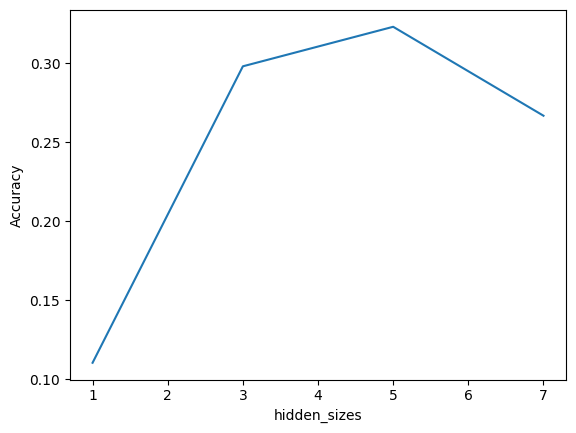

In [8]:
from sklearn.neural_network import MLPClassifier

hidden_sizes = range(1, 9, 2)
accuracies = np.zeros(len(hidden_sizes))

for s, size in enumerate(hidden_sizes):
    # Crea el clasificador con size neuronas en la capa oculta.
    # Después entrénalo, y obten la precisión en los datos de entrenamiento.
    # Guarda la precisión final en una variable accTrain.
    clasificador = MLPClassifier(hidden_layer_sizes = size, solver = 'lbfgs', max_iter = 300)
    
    clasificador.fit(Xtrain,ytrain.ravel())
    
    y_pred = clasificador.predict(Xtest)
    
    accTrain = accuracy_score(y_pred, ytest)
    
    accuracies[s] = accTrain

# Muestra en una gráfica como ha cambiado el error conforme aumentábamos hidden_sizes
plt.plot(hidden_sizes, accuracies)
plt.xlabel('hidden_sizes');
plt.ylabel('Accuracy');

In [17]:
from sklearn.neural_network import MLPClassifier

hidden_sizes = (60)



clasificador = MLPClassifier(hidden_layer_sizes = 60, solver = 'lbfgs', max_iter = 500)

clasificador.fit(Xtrain,ytrain.ravel())

y_pred = clasificador.predict(Xtest)

accTrain = accuracy_score(y_pred, ytest)

print("Accuracy: "+str(accuracy_score(ytest, y_pred)))
print('\n')
print(classification_report(ytest, y_pred))

Accuracy: 0.4953125


              precision    recall  f1-score   support

     cavallo       0.65      0.45      0.53        73
    elefante       0.55      0.55      0.55        99
    farfalla       0.55      0.43      0.48        84
     gallina       0.50      0.52      0.51        81
       gatto       0.55      0.54      0.54        74
       mucca       0.52      0.51      0.51        77
      pecora       0.41      0.46      0.43        81
       ragno       0.35      0.51      0.41        71

    accuracy                           0.50       640
   macro avg       0.51      0.49      0.50       640
weighted avg       0.51      0.50      0.50       640

